## **Library**

In [0]:
#import Library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random as rd
from copy import deepcopy
from sklearn import preprocessing

## **Prepare Data**

1.   Read Dataset
2.   Drop Columns
3.   Handling of Missing Data
4.   Handling of Categorical Data
5.	Encoder Data
6.	Feature Scaling





In [69]:
#Read Data
df=pd.read_csv("https://raw.githubusercontent.com/hafidhnofal/D4T4/master/Machine%20Learning/used_cars.csv")
#Cleaning Data
#Drop Columns
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)
df.drop('url', axis=1, inplace=True)
df.drop('region_url', axis=1, inplace=True)
df.drop('image_url', axis=1, inplace=True)
df.drop('vin', axis=1, inplace=True)
df.drop('description', axis=1, inplace=True)
df.drop('county', axis=1, inplace=True)

#Fill NaN Value
i=0
for i in range(df.shape[1]):
  df[df.iloc[:,i].name].fillna( method ='ffill', inplace = True) 
df.fillna(df.mean(), inplace=True)
df['price'] = df['price'].replace(0,df['price'].mean()) 
df['price']=df['price'].round(0)

df_N=df
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,salt lake city,17899.0,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,4wd,compact,hatchback,black,ut,40.7372,-111.858
1,salt lake city,76641.0,2016.0,ford,f-150,excellent,4 cylinders,gas,10.0,clean,automatic,4wd,compact,hatchback,black,ut,40.5881,-111.884
2,salt lake city,46463.0,2015.0,gmc,sierra 1500,excellent,4 cylinders,gas,7554.0,clean,automatic,4wd,compact,hatchback,white,ut,40.5881,-111.884
3,salt lake city,76641.0,2016.0,ford,f-150,excellent,4 cylinders,gas,10.0,clean,automatic,4wd,compact,hatchback,white,ut,40.5881,-111.884
4,salt lake city,49999.0,2018.0,ford,f-450,excellent,4 cylinders,diesel,70150.0,clean,automatic,4wd,compact,pickup,white,ut,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,kennewick-pasco-richland,49999.0,2016.0,ram,cummin 2500 laramie,good,6 cylinders,diesel,43406.0,clean,automatic,4wd,compact,truck,grey,wa,46.2348,-119.128
19997,kennewick-pasco-richland,12127.0,2018.0,nissan,sentra,good,4 cylinders,gas,32867.0,clean,automatic,fwd,compact,sedan,grey,wa,46.5642,-120.496
19998,kennewick-pasco-richland,76641.0,2019.0,jeep,grand cherokee limited,good,6 cylinders,gas,17514.0,clean,automatic,4wd,compact,SUV,grey,wa,46.0783,-118.293
19999,kennewick-pasco-richland,14661.0,2017.0,toyota,corolla,good,4 cylinders,gas,30486.0,clean,automatic,fwd,compact,sedan,grey,wa,46.5642,-120.496


In [70]:
#Encoder the data
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.describe()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
count,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000
mean,7.846058,1058.061597,73.835408,18.878106,2161.991950,1.068947,4.616119,1.886606,5054.306685,0.092245,0.145343,0.636018,1.195240,6.107395,5.411079,1.458027,1215.350682,1079.583471
std,5.214418,705.581922,7.857710,11.071294,1153.479617,1.116958,1.268908,0.650185,2795.729743,0.590373,0.427814,0.735806,0.772741,4.154199,4.091932,0.810402,681.578558,677.859512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,414.000000,71.000000,12.000000,1258.000000,0.000000,3.000000,2.000000,2671.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,659.000000,496.000000
50%,9.000000,952.000000,75.000000,15.000000,2112.000000,1.000000,5.000000,2.000000,5212.000000,0.000000,0.000000,0.000000,1.000000,8.000000,5.000000,1.000000,1279.000000,1212.000000
75%,11.000000,1629.000000,79.000000,29.000000,3196.000000,2.000000,6.000000,2.000000,7504.000000,0.000000,0.000000,1.000000,2.000000,9.000000,9.000000,2.000000,1840.000000,1707.000000
max,16.000000,2253.000000,84.000000,39.000000,4143.000000,5.000000,7.000000,4.000000,9646.000000,5.000000,2.000000,2.000000,3.000000,12.000000,11.000000,3.000000,2339.000000,2303.000000


In [71]:
# Fit Data using MinMaxScaler
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
col=['region','price','year','manufacturer','model','condition','cylinders','fuel','odometer','title_status','transmission','drive','size','type','paint_color','state','lat','long']

scaled_data = scaler.fit_transform(df)
df_tf = pd.DataFrame(scaled_data, columns=col)
df_tf

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,0.7500,0.578340,0.904762,0.974359,0.530292,0.0,0.428571,0.5,0.343977,0.0,0.5,0.0,0.0,0.333333,0.000000,0.0,0.684053,0.135475
1,0.7500,0.992455,0.952381,0.307692,0.425778,0.0,0.428571,0.5,0.000518,0.0,0.0,0.0,0.0,0.333333,0.000000,0.0,0.681915,0.134607
2,0.7500,0.950732,0.940476,0.333333,0.792904,0.0,0.428571,0.5,0.024570,0.0,0.0,0.0,0.0,0.333333,0.909091,0.0,0.681915,0.134607
3,0.7500,0.992455,0.952381,0.307692,0.425778,0.0,0.428571,0.5,0.000518,0.0,0.0,0.0,0.0,0.333333,0.909091,0.0,0.681915,0.134607
4,0.7500,0.964492,0.976190,0.307692,0.444847,0.0,0.428571,0.0,0.385134,0.0,0.0,0.0,0.0,0.666667,0.909091,0.0,0.680633,0.141120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,0.3125,0.964492,0.952381,0.820513,0.332851,0.4,0.714286,0.0,0.228488,0.0,0.0,0.0,0.0,0.833333,0.454545,1.0,0.889696,0.089014
19997,0.3125,0.401687,0.976190,0.743590,0.782525,0.4,0.428571,0.5,0.155920,0.0,0.0,0.5,0.0,0.750000,0.454545,1.0,0.898675,0.073817
19998,0.3125,0.992455,0.988095,0.487179,0.536809,0.4,0.714286,0.5,0.063757,0.0,0.0,0.0,0.0,0.000000,0.454545,1.0,0.881146,0.094225
19999,0.3125,0.484687,0.964286,0.948718,0.307989,0.4,0.428571,0.5,0.138814,0.0,0.0,0.5,0.0,0.750000,0.454545,1.0,0.898675,0.073817


## **Plotting Data**
Plot data for imagine what the feature which should we use for modelling.



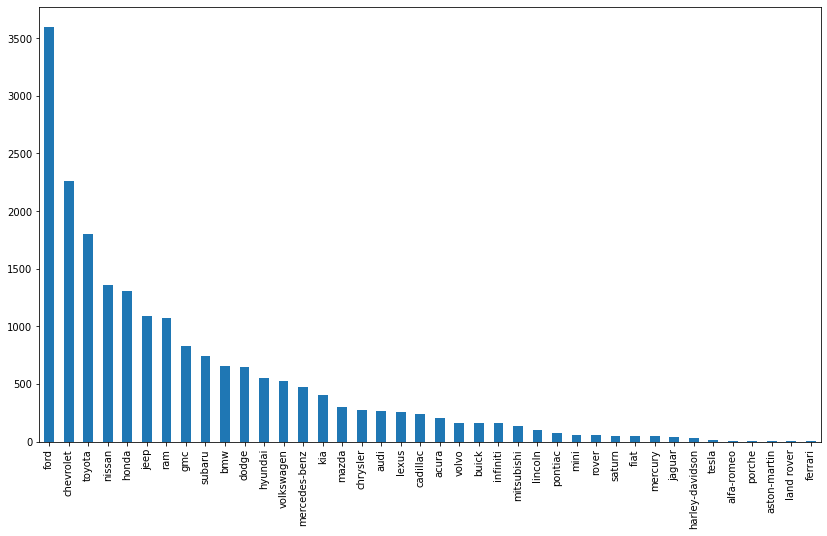

In [72]:
#Plot Total cars in manufacture
df_N['manufacturer'].value_counts().plot(kind='bar',figsize=(14,8))

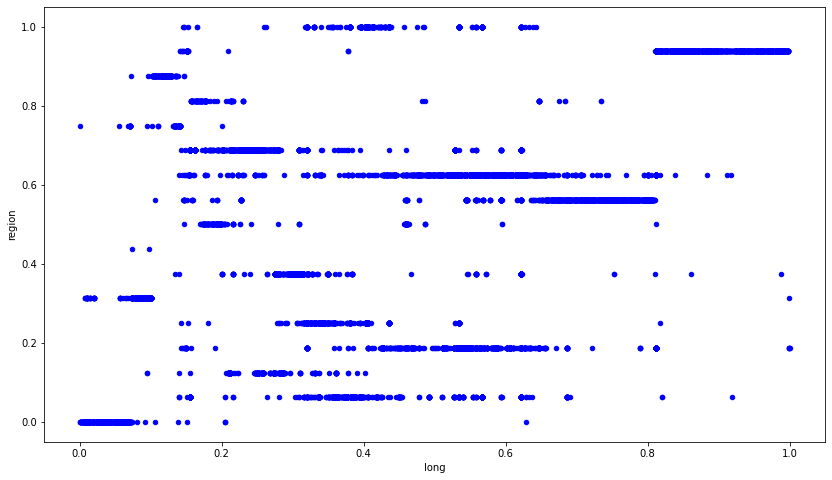

In [73]:
#Plot long correlation with region
df_tf.plot(kind='scatter',x='long',y='region',color='blue', figsize=(14,8))

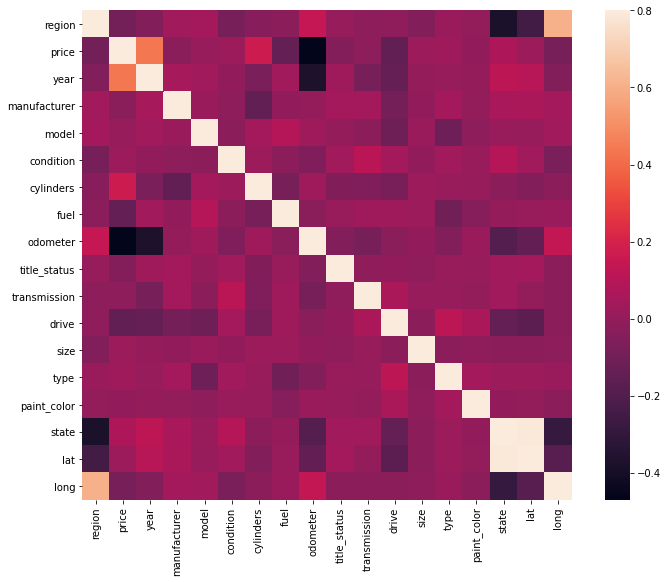

In [74]:
#correlation matrix
corrmat = df_tf.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [0]:
from sklearn.model_selection import train_test_split

#Define feature choosen
feature = ['region', 'price', 'year', 'manufacturer','model','condition','cylinders',
           'odometer','title_status','transmission','drive','size','paint_color','state','lat','long']
X = df[feature] # Features
y = df['fuel'] # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109) # 70% training and 30% test


## **Clasification with Decission Tree**


In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Create Decision Tree classifer object
model_dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
model_dt = model_dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model_dt.predict(X_test)  
# Model Accuracy
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       501
           1       0.33      0.58      0.42        12
           2       0.96      0.95      0.96      5279
           3       0.54      0.63      0.58        59
           4       0.44      0.41      0.42       150

    accuracy                           0.92      6001
   macro avg       0.60      0.66      0.62      6001
weighted avg       0.92      0.92      0.92      6001



## **Clustering with K-Means**
This clustering requires quite a long time to process

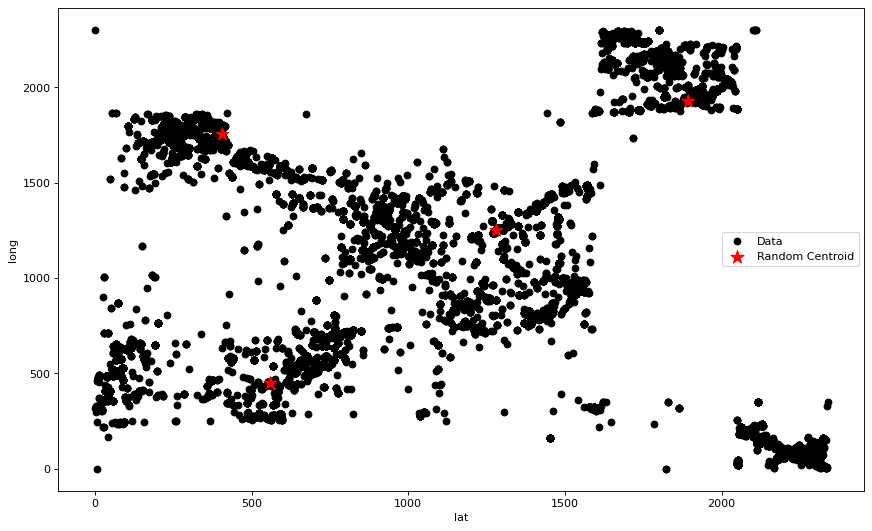

In [77]:
#X = df_tf[["lat","long"]] # Use Normalize Data
X = df[["lat","long"]] # Don't Use Normalize Data
#number of clusters
K=len(df['state'].unique())

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.figure(figsize=(13, 8), dpi=80)
plt.scatter(X["lat"],X["long"],c='black',label='Data')
plt.scatter(Centroids["lat"],Centroids["long"],c='red', marker='*', s=150,label='Random Centroid')
plt.xlabel('lat')
plt.ylabel('long')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


70.15484996885391
-28.653154993104977
-78.27717847739234
-49.850509633762954
69.30028567055928
164.21363575264246
16.008169303543582
-9.635721235434971
-36.05734885397442
-0.9549532922403614
0.0


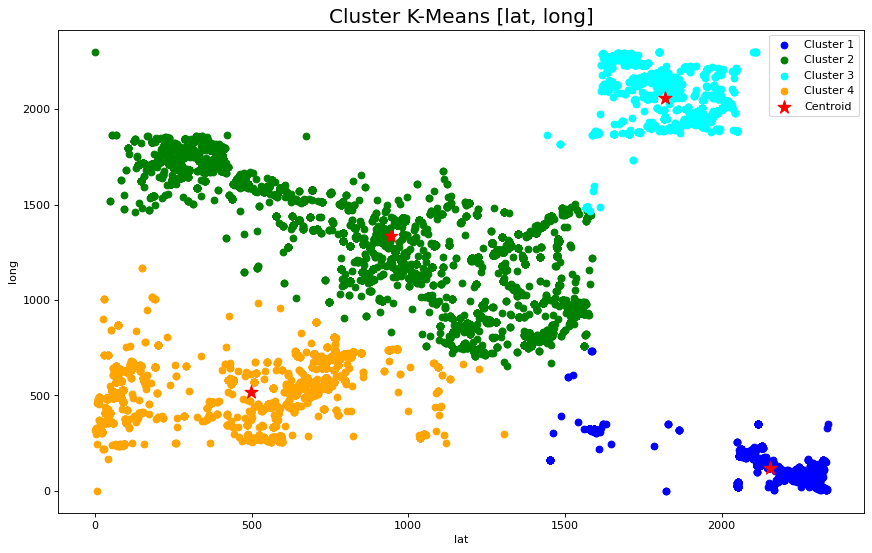

In [78]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["lat"]-row_d["lat"])**2
            d2=(row_c["long"]-row_d["long"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["long","lat"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['long'] - Centroids['long']).sum() + (Centroids_new['lat'] - Centroids['lat']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["long","lat"]]

color=['blue','green','cyan','orange']
labels=['Cluster 1','Cluster 2','Cluster 3','Cluster 4']
plt.figure(figsize=(13, 8), dpi=80)
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["lat"],data["long"],c=color[k],label=labels[k])
    
plt.scatter(Centroids["lat"],Centroids["long"],c='red', marker='*', s=150,label='Centroid')
plt.title('Cluster K-Means [lat, long]', fontsize=18)
plt.xlabel('lat')
plt.ylabel('long')
plt.legend()
plt.show()

## Experiment

Classification with Naive Bayes


In [79]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# Create Decision Tree classifer object
model_nb = GaussianNB()

# Train Decision Tree Classifer
model_nb = model_nb.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model_nb.predict(X_test)  
# Model Accuracy, how often is the classifier correct?
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.15      0.22       501
           1       0.03      0.17      0.05        12
           2       0.89      0.94      0.92      5279
           3       0.13      0.15      0.14        59
           4       0.11      0.08      0.09       150

    accuracy                           0.85      6001
   macro avg       0.32      0.30      0.28      6001
weighted avg       0.82      0.85      0.83      6001



**Clustering with different feature**

*   [latitude and state]
*   [long and region]


> I choose this feature based on matrix corelation





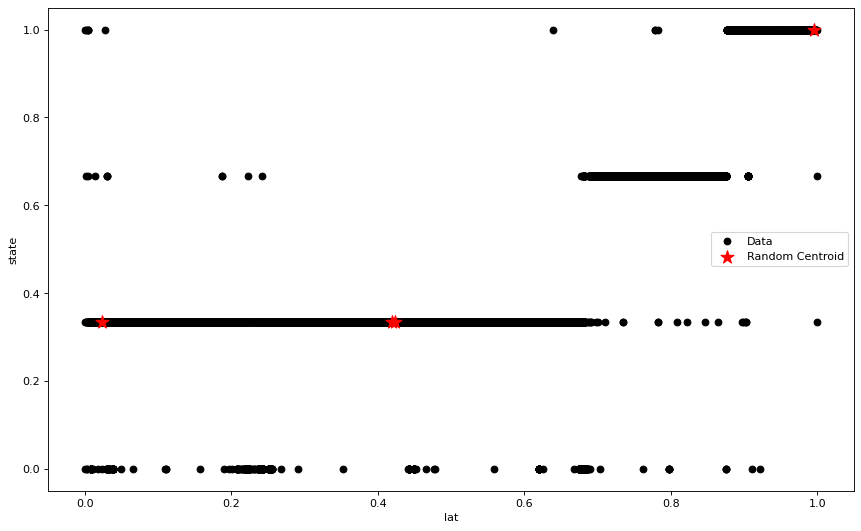

In [86]:

X = df_tf[["state","lat"]] # Use Normalize Data
#number of clusters
K=4

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.figure(figsize=(13, 8), dpi=80)
plt.scatter(X["lat"],X["state"],c='black',label='Data')
plt.scatter(Centroids["lat"],Centroids["state"],c='red', marker='*', s=150,label='Random Centroid')
plt.xlabel('lat')
plt.ylabel('state')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


-0.05267714015728624
-0.00039974677221001065
-5.719730513276122e-05
0.0


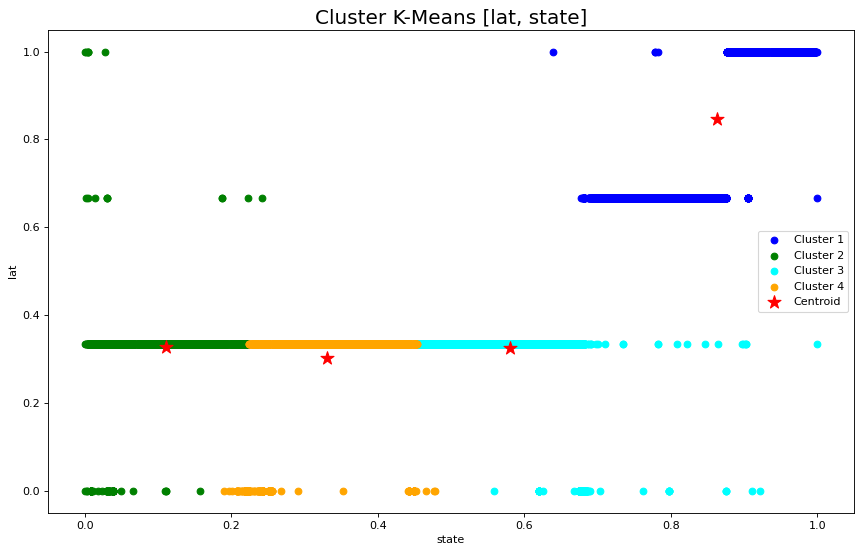

In [87]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["lat"]-row_d["lat"])**2
            d2=(row_c["state"]-row_d["state"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["state","lat"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['state'] - Centroids['state']).sum() + (Centroids_new['lat'] - Centroids['lat']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["state","lat"]]

color=['blue','green','cyan','orange']
labels=['Cluster 1','Cluster 2','Cluster 3','Cluster 4']
plt.figure(figsize=(13, 8), dpi=80)
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["lat"],data["state"],c=color[k],label=labels[k])
    
plt.scatter(Centroids["lat"],Centroids["state"],c='red', marker='*', s=150,label='Centroid')
plt.title('Cluster K-Means [lat, state]', fontsize=18)
plt.xlabel('state')
plt.ylabel('lat')
plt.legend()
plt.show()

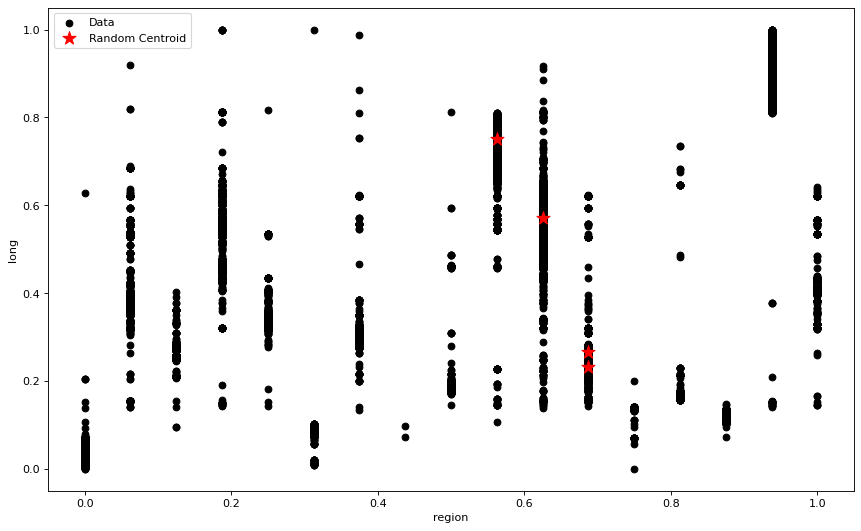

In [82]:
X = df_tf[["region","long"]] # Use Normalize Data
#number of clusters
K=4

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.figure(figsize=(13, 8), dpi=80)
plt.scatter(X["region"],X["long"],c='black',label='Data')
plt.scatter(Centroids["region"],Centroids["long"],c='red', marker='*', s=150,label='Random Centroid')
plt.xlabel('region')
plt.ylabel('long')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


-0.02645870073377525
-0.019107808856693234
-0.049126299576760304
-0.08289825461735995
-0.13419974267156667
-0.10897450030113115
-0.033100979916864656
-0.006536095229036011
0.0


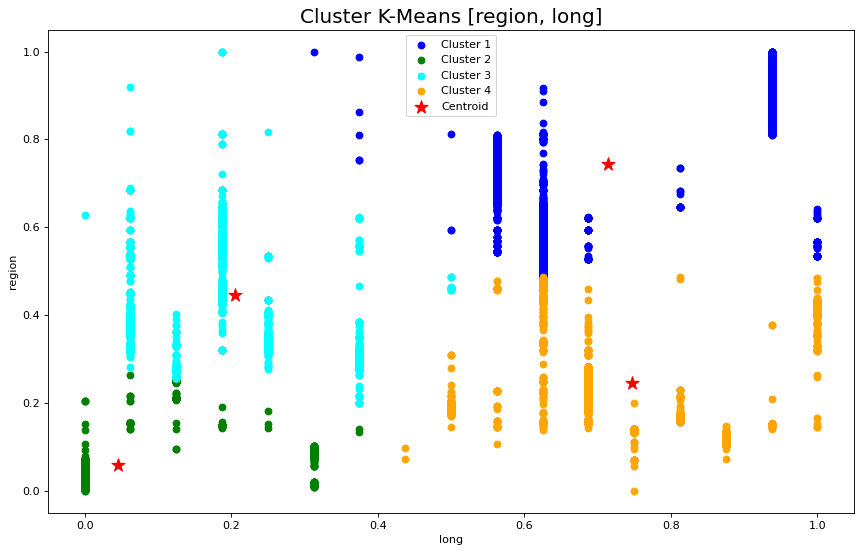

In [83]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["region"]-row_d["region"])**2
            d2=(row_c["long"]-row_d["long"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["long","region"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['long'] - Centroids['long']).sum() + (Centroids_new['region'] - Centroids['region']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["long","region"]]

color=['blue','green','cyan','orange']
labels=['Cluster 1','Cluster 2','Cluster 3','Cluster 4']
plt.figure(figsize=(13, 8), dpi=80)
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["region"],data["long"],c=color[k],label=labels[k])
    
plt.scatter(Centroids["region"],Centroids["long"],c='red', marker='*', s=150,label='Centroid')
plt.title('Cluster K-Means [region, long]', fontsize=18)
plt.xlabel('long')
plt.ylabel('region')
plt.legend()
plt.show()

In [84]:
'''from google.colab import drive

drive.mount('/gdrive')
df.to_csv('used_cars_encoder.csv', index=False)
!cp used_cars_clean.csv "drive/My Drive/"'''

'from google.colab import drive\n\ndrive.mount(\'/gdrive\')\ndf.to_csv(\'used_cars_encoder.csv\', index=False)\n!cp used_cars_clean.csv "drive/My Drive/"'